## 14. Covid 19 final project data visualisation

In this class, we will continue the Covid 19 spatial epidemiological modelling by running the simulation engine we coded in the previous class, and will create an animated spatio-temporal visualisation of the epidemic spreading in Yerevan city.

In [1]:
#import the basic libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import geopandas as gpd, pandas as pd
import contextily as ctx

In [2]:
# define plot function
def seir_plot(res):
    plt.plot(res[::12, 0], color='r', label='S')
    plt.plot(res[::12, 1], color='g', label='E')
    plt.plot(res[::12, 2], color='b', label='I')
    plt.plot(res[::12, 3], color='y', label='R')
    plt.plot(res[::12, 4], color='c', label='H')
    plt.legend()

In [3]:
# load OD matrices
pkl_file = open('../data/Yerevan_OD_matrices.pkl', 'rb') # change to your desired directory
OD_matrices = pickle.load(pkl_file)
pkl_file.close()
print(OD_matrices)

[[[ 42.   0.   0. ...   0.   0.   0.]
  [  0.  42.   0. ...   0.   0.   0.]
  [  0.   0.  42. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ... 853.   0.   0.]
  [  0.   0.   0. ...   0.  42.   0.]
  [  0.   0.   0. ...   0.   0.  42.]]

 [[ 76.   0.   0. ...   0.   0.   0.]
  [  0.  76.   0. ...   0.   0.   0.]
  [  0.   0.  76. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ... 765.   0.   0.]
  [  0.   0.   0. ...   0.  76.   0.]
  [  0.   0.   0. ...   0.   0.  76.]]

 [[ 63.   0.   0. ...   0.   0.   0.]
  [  0.  63.   0. ...   0.   0.   0.]
  [  0.   0.  63. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ... 765.   0.   0.]
  [  0.   0.   0. ...   0.  63.   0.]
  [  0.   0.   0. ...   0.   0.  63.]]

 ...

 [[ 17.   0.   0. ...   0.   0.   0.]
  [  0.  17.   0. ...   0.   0.   0.]
  [  0.   0.  17. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ... 444.   0.   0.]
  [  0.   0.   0. ...   0.  17.   0.]
  [  0.   0.   0. ...   0.   0.  17.]]

 [[ 20.   0.   0. ...   0.   0.   0.]
  [  0.  20.

In [4]:
np.set_printoptions(suppress=True, precision=3)

# load population densities
pkl_file = open('../data/Yerevan_population.pkl', 'rb')
pop = pickle.load(pkl_file)
pkl_file.close()
print(pop)

[[  0.      0.      0.    ... 717.269   0.      0.   ]
 [  0.      0.      0.    ... 791.557   0.      0.   ]
 [  0.      0.      0.    ... 834.591   0.      0.   ]
 ...
 [  0.      0.      0.    ... 872.206   0.      0.   ]
 [  0.      0.      0.    ... 760.611   0.      0.   ]
 [  0.      0.      0.    ... 539.288   0.      0.   ]]


In [5]:
pop[13] == pop[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
# set up model
%run virus-sim.py

r = OD_matrices.shape[0]
n = pop.shape[1]
N = 1000000.0

initialInd = [334, 353, 196, 445, 162, 297]
initial = np.zeros(n)
initial[initialInd] = 50

model = Param(R0=2.4, DE= 5.6 * 12, DI= 5.2 * 12, \
              I0=initial, HospitalisationRate=0.1, HospitalIters=15*12)

In [7]:
# run simulation
%run virus-sim.py

alpha = np.ones(OD_matrices.shape)
iterations = 3000
res = {}
inf = 50
res['baseline'] = seir(model, pop, OD_matrices, alpha, iterations, inf)

Max number of hospitalised people:  32416 
 Day with max hospitalised people:  79


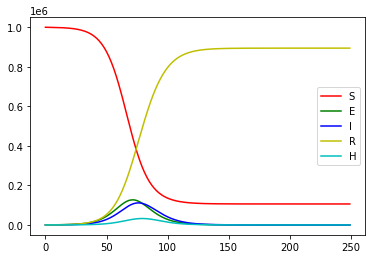

In [8]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:,4].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,4].argmax()/12)
)
# plot result
seir_plot(res["baseline"][0])

### Spatial Visualisation

In [9]:
from pyproj import CRS
crs = CRS.from_epsg(4326)

In [10]:
# load Yerevan grid file
yerevan_gdf = gpd.read_file("../data/Yerevan grid shapefile/Yerevan.shp")
#yerevan_gdf.crs = {'init':'epsg:4326'}
yerevan_gdf.crs = crs
yerevan_gdf.head()

FID                                           geometry
0    0  POLYGON ((44.41298 40.18969, 44.41155 40.19399...
1    1  POLYGON ((44.41772 40.18316, 44.41418 40.18603...
2    2  POLYGON ((44.42035 40.18107, 44.42025 40.18110...
3    3  POLYGON ((44.42598 40.17664, 44.42576 40.17920...
4    4  POLYGON ((44.42652 40.17009, 44.42598 40.17664...

In [11]:
# convert to crs used by contextily
yerevan_gdf_3857 = yerevan_gdf.to_crs(epsg=3857)
west, south, east, north = yerevan_gdf_3857.unary_union.bounds

In [12]:
# declare baseline array storing the dynamics of the compartments 
baseline = res['baseline'][1][::12, :, :]
print(baseline.shape)
print(baseline)

(250, 5, 549)
[[[  0.      0.      0.    ... 717.269   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]]

 [[  0.      0.      0.    ... 654.597   0.      0.   ]
  [  0.      0.      0.    ...   0.032   0.      0.   ]
  [  0.      0.      0.    ...   0.062   0.      0.   ]
  [  0.      0.      0.    ...   0.013   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]]

 [[  0.      0.      0.    ... 637.726   0.      0.   ]
  [  0.      0.      0.    ...   0.076   0.      0.   ]
  [  0.      0.      0.    ...   0.085   0.      0.   ]
  [  0.      0.      0.    ...   0.036   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]]

 ...

 [[  0.      0.      0.    ...  67.659   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0

In [13]:
# declare hopsitalisation array storing the dynamics of the hospitalised 
hosp = res['baseline'][0][::12, 4]
print(hosp.shape)
print(hosp)

(250,)
[    0.        0.757     3.483     7.7      13.118    19.596    27.087
    35.587    45.143    55.847    67.806    81.151    96.03    112.618
   131.073   151.599   173.694   196.413   220.53    246.66    275.321
   306.895   341.812   380.56    423.604   471.448   524.636   583.793
   649.429   722.252   803.152   892.995   992.746  1103.452  1226.325
  1362.317  1512.779  1679.399  1863.785  2067.698  2293.014  2541.88
  2815.833  3117.136  3448.604  3812.737  4212.182  4649.614  5128.004
  5648.903  6214.982  6829.561  7494.94   8213.236  8986.111  9815.182
 10699.039 11637.691 12631.444 13678.11  14774.571 15916.347 17098.275
 18310.363 19544.701 20793.275 22044.421 23285.716 24503.606 25684.541
 26810.69  27868.821 28846.587 29729.223 30503.786 31158.618 31684.462
 32070.733 32314.296 32413.794 32367.096 32175.767 31843.77  31377.84
 30784.325 30076.036 29265.7   28364.325 27384.992 26341.207 25246.861
 24114.015 22957.623 21790.324 20621.849 19461.923 18319.175 17201.26
 1

In [14]:
print(res['baseline'][0].shape)
res['baseline']

(3000, 5)


(array([[999700.   ,      0.   ,    300.   ,      0.   ,      0.   ],
        [999688.556,     11.444,    295.192,      4.808,      0.   ],
        [999679.116,     20.713,    290.632,      9.538,      0.   ],
        ...,
        [105959.841,      0.041,      0.072, 894040.046,      0.024],
        [105959.84 ,      0.041,      0.071, 894040.047,      0.024],
        [105959.84 ,      0.041,      0.071, 894040.049,      0.024]]),
 array([[[  0.   ,   0.   ,   0.   , ..., 717.269,   0.   ,   0.   ],
         [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
         [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
         [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
         [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]],
 
        [[  0.   ,   0.   ,   0.   , ..., 762.673,   0.   ,   0.   ],
         [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
         [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
  

In [15]:
# find maximum hospitalisation value to make sure the color intensities in the animation are anchored against it
max_exp_ind = np.where(baseline[:, 1, :] == baseline[:, 1, :].max())[0].item()
max_exp_val = baseline[:, 1, :].max()
print(max_exp_ind, max_exp_val)

73 3192.340597623942


Let's create a custom colormap:

(256, 4)
[[1.    0.961 0.941 1.   ]
 [1.    0.958 0.937 1.   ]
 [1.    0.956 0.934 1.   ]
 ...
 [0.419 0.004 0.053 1.   ]
 [0.412 0.002 0.052 1.   ]
 [0.404 0.    0.051 1.   ]]


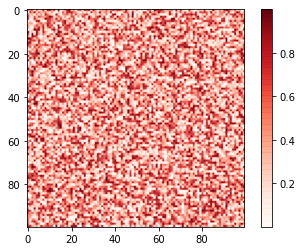

In [16]:
ncolors = 256
# get cmap
color_array = plt.get_cmap('Reds')(range(ncolors))
print(color_array.shape)
print(color_array)

# change alpha values
color_array[:, -1] = np.linspace(0.3, 1, ncolors)

# create colormap object
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="Reds_transp", colors=color_array)

# register the colormap object
plt.register_cmap(cmap=map_object)

# plot some example data
fig, ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap='Reds_transp')
plt.colorbar(mappable=h)

In [17]:
print(color_array)

[[1.    0.961 0.941 0.3  ]
 [1.    0.958 0.937 0.303]
 [1.    0.956 0.934 0.305]
 ...
 [0.419 0.004 0.053 0.995]
 [0.412 0.002 0.052 0.997]
 [0.404 0.    0.051 1.   ]]


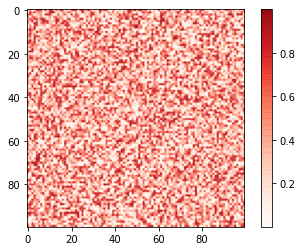

In [18]:
def trunc_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n}, {a:.2f}, {b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
                                                cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Reds_transp')
new_cmap = trunc_colormap(cmap, 0.0, .9)

# plot some example data
fig, ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap=new_cmap)
plt.colorbar(mappable=h)

In order not to get lost in the dimensions of the multidimensional results array, let's have them printed:

In [19]:
print("baseline dimensions: ", baseline.shape)
print("hosp dimensions: ", hosp.shape)

baseline dimensions:  (250, 5, 549)
hosp dimensions:  (250,)


In [20]:
baseline[0, 1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Finally, let's start coding the animated spatio-temporal visualisation!

 10%|███████▌                                                                       | 24/250 [00:27<03:37,  1.04it/s]

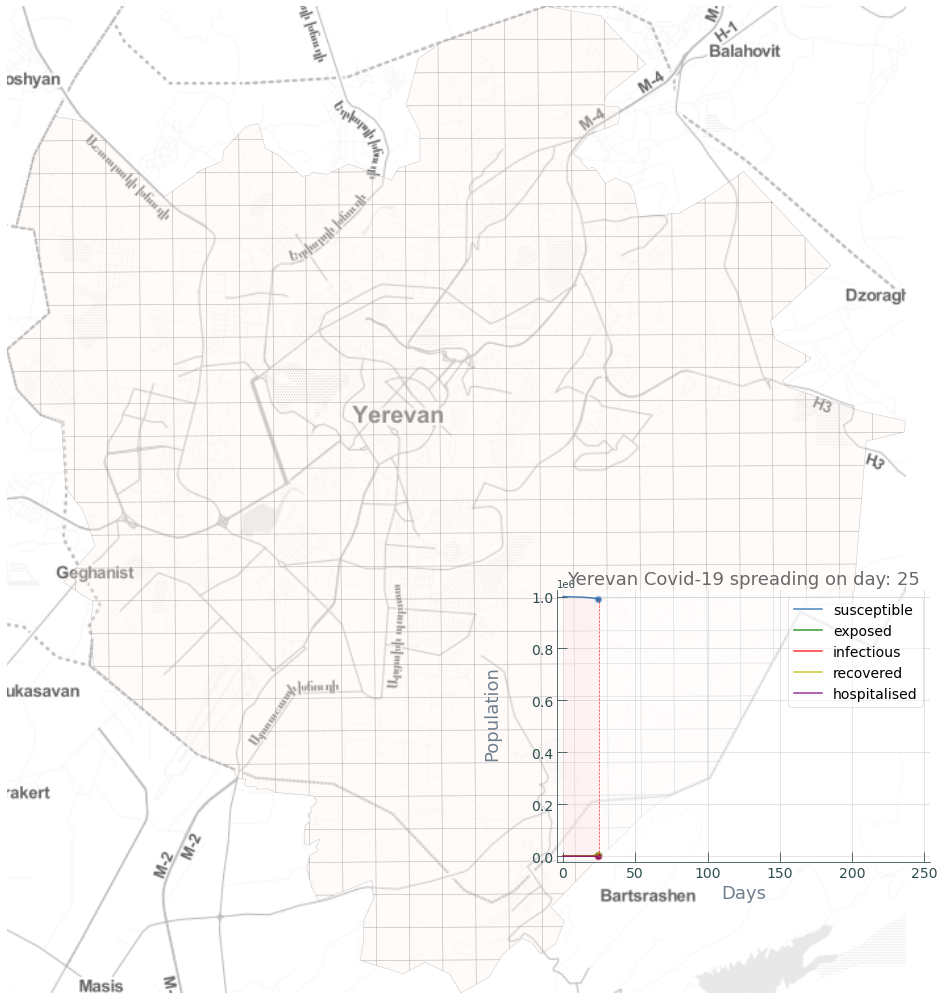

 20%|███████████████▍                                                               | 49/250 [00:52<02:59,  1.12it/s]

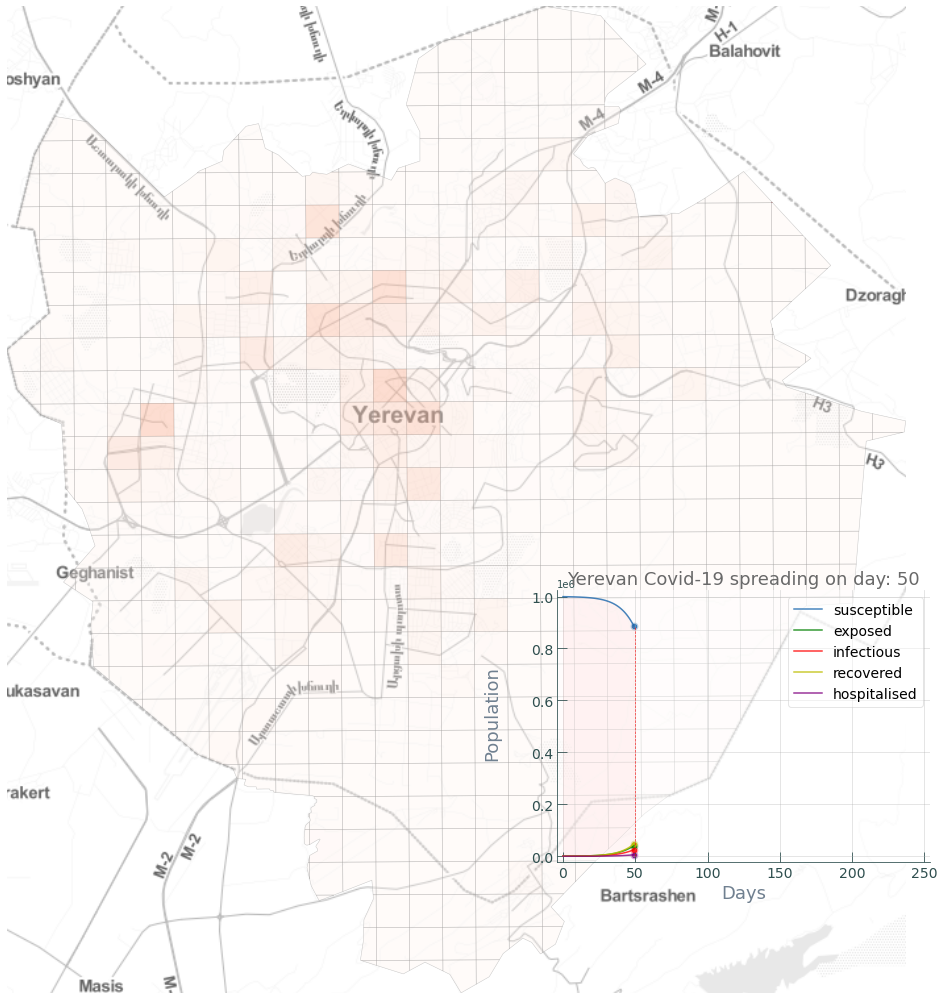

 30%|███████████████████████▍                                                       | 74/250 [01:18<02:53,  1.02it/s]

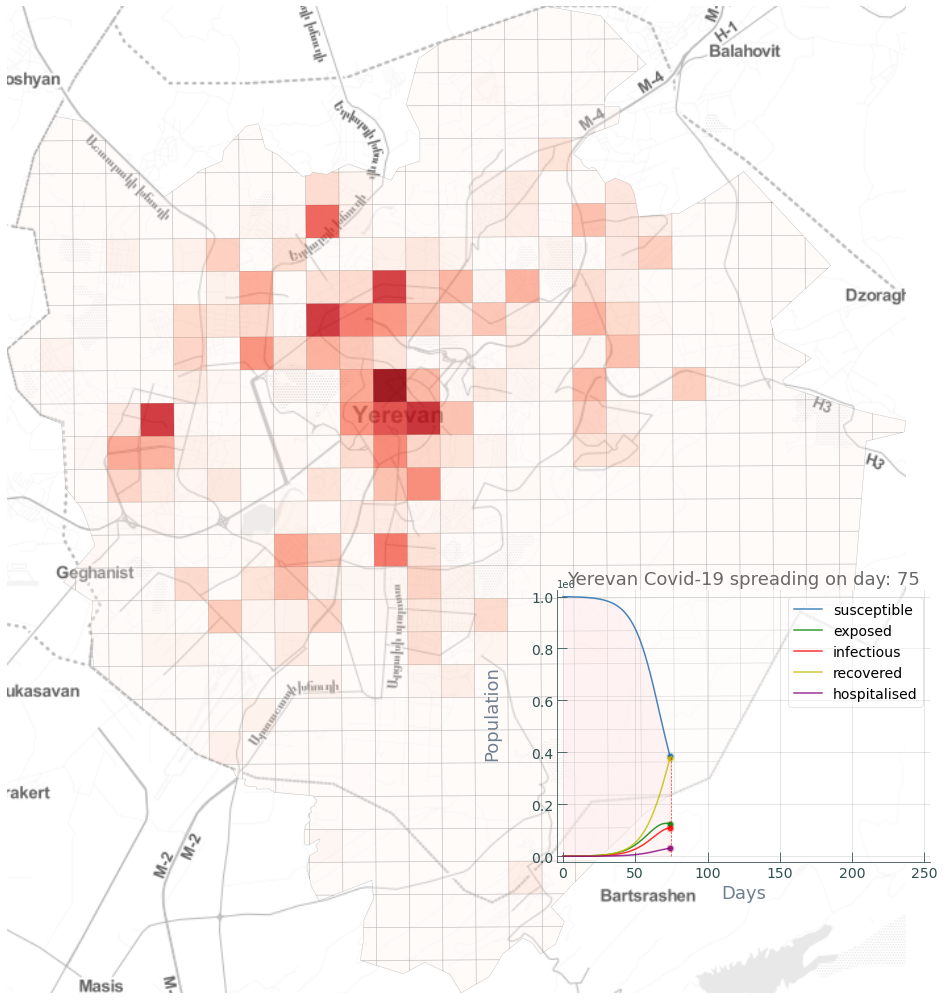

 40%|███████████████████████████████▎                                               | 99/250 [01:42<02:27,  1.02it/s]

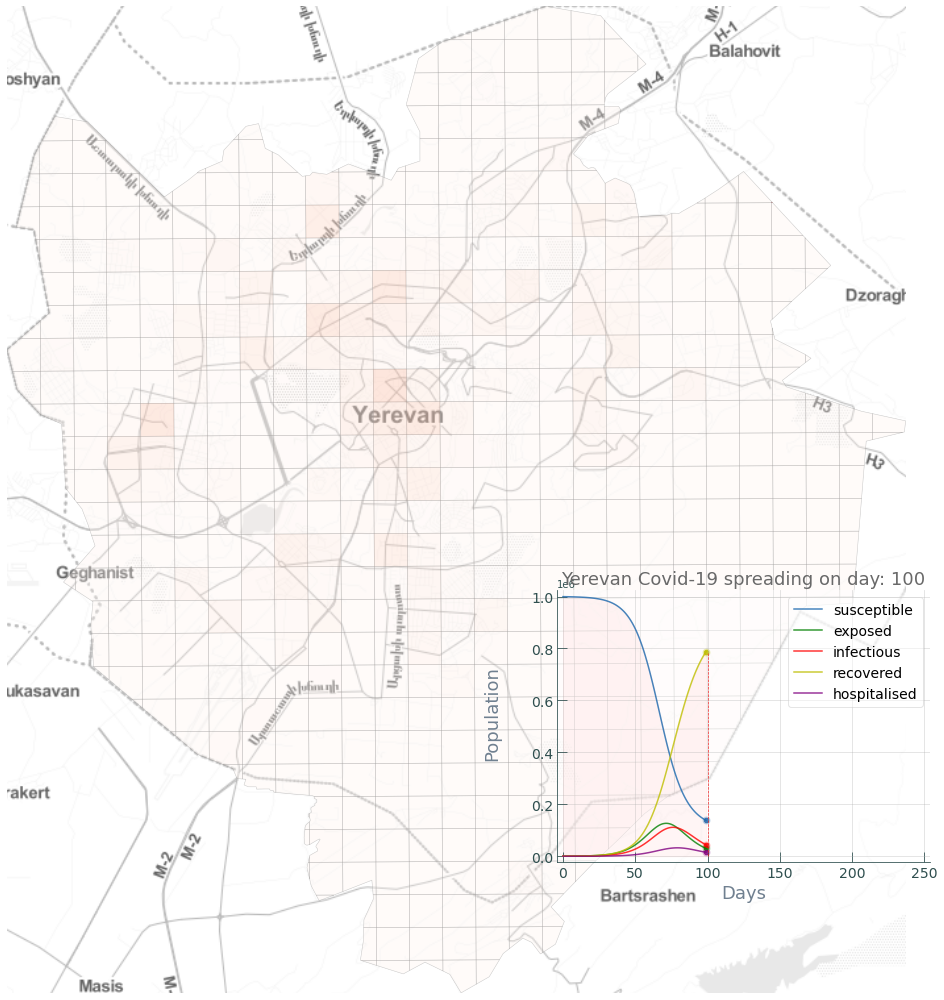

 50%|██████████████████████████████████████▋                                       | 124/250 [02:07<02:03,  1.02it/s]

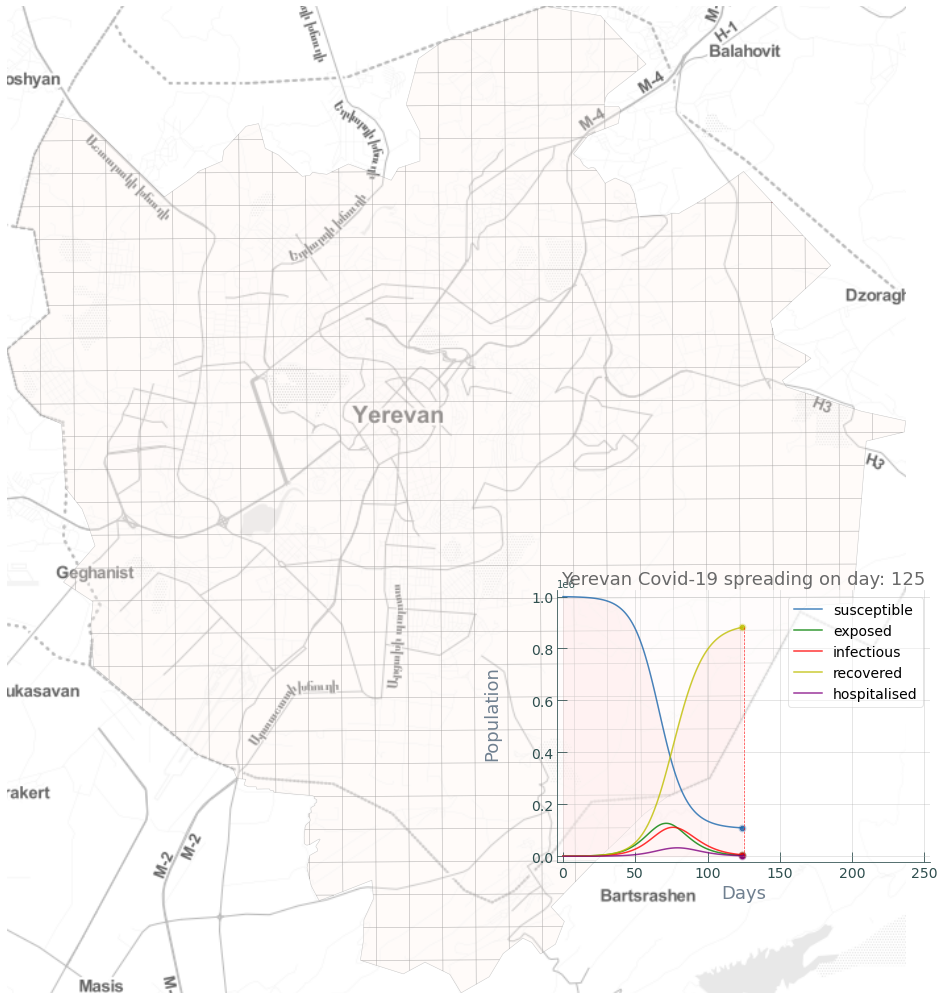

 60%|██████████████████████████████████████████████▍                               | 149/250 [02:31<01:27,  1.16it/s]

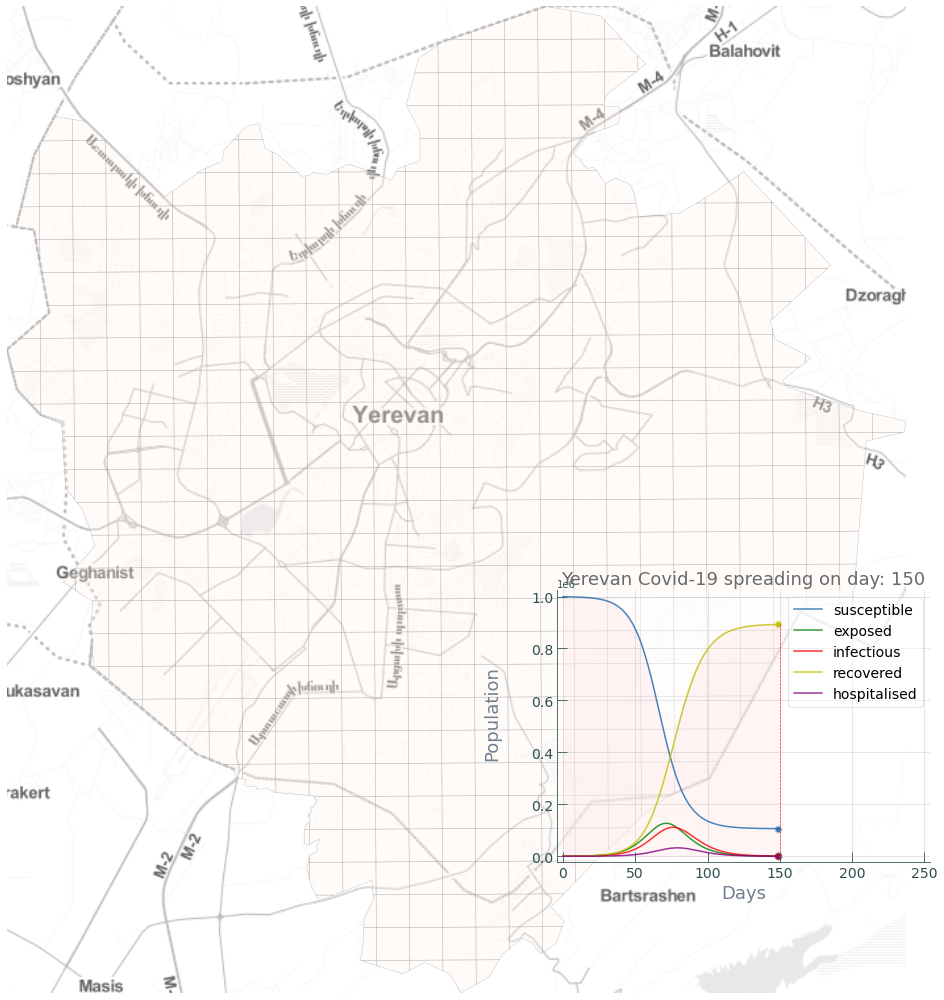

 70%|██████████████████████████████████████████████████████▎                       | 174/250 [02:55<01:12,  1.05it/s]

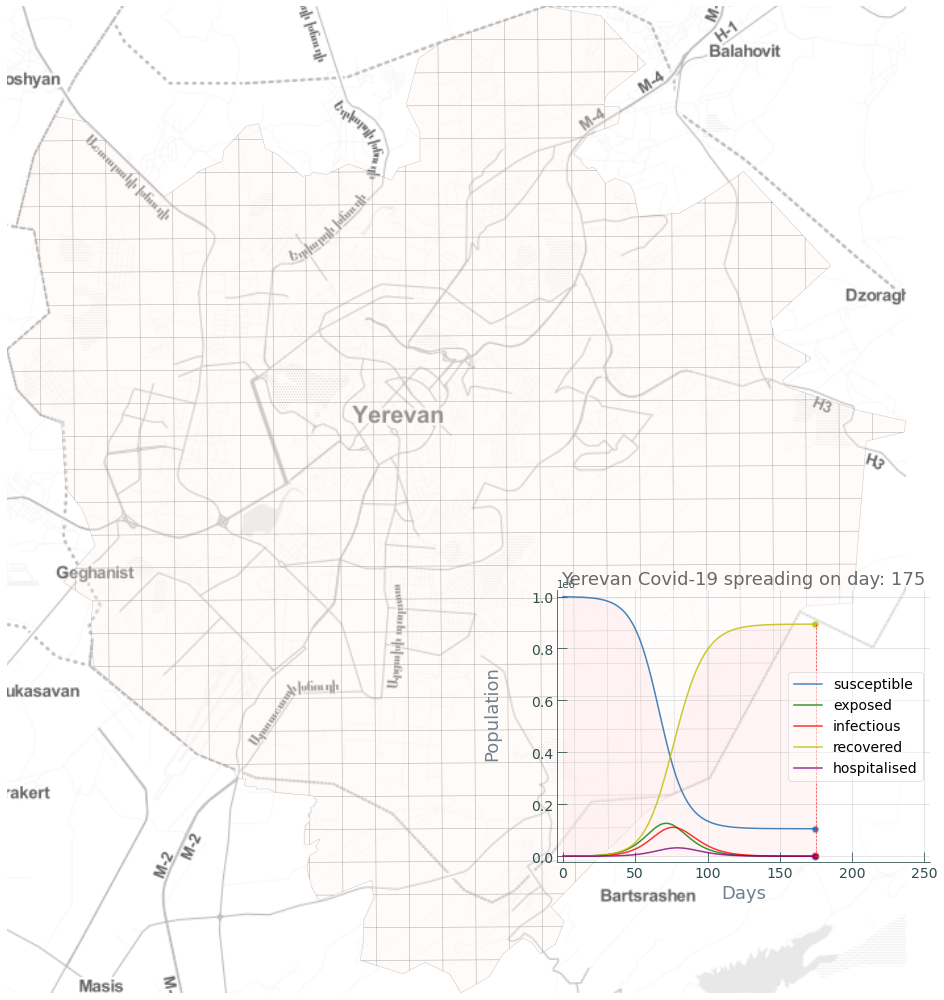

 80%|██████████████████████████████████████████████████████████████                | 199/250 [03:20<00:46,  1.10it/s]

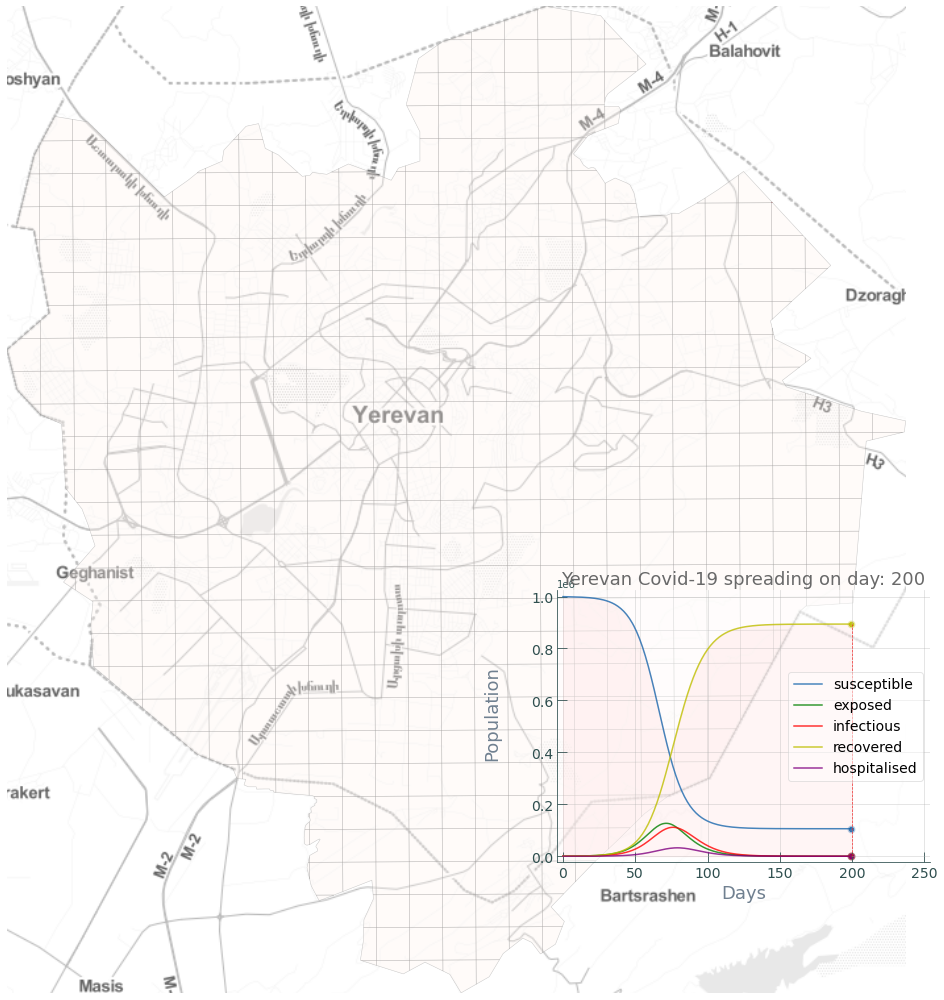

 90%|█████████████████████████████████████████████████████████████████████▉        | 224/250 [03:45<00:25,  1.02it/s]

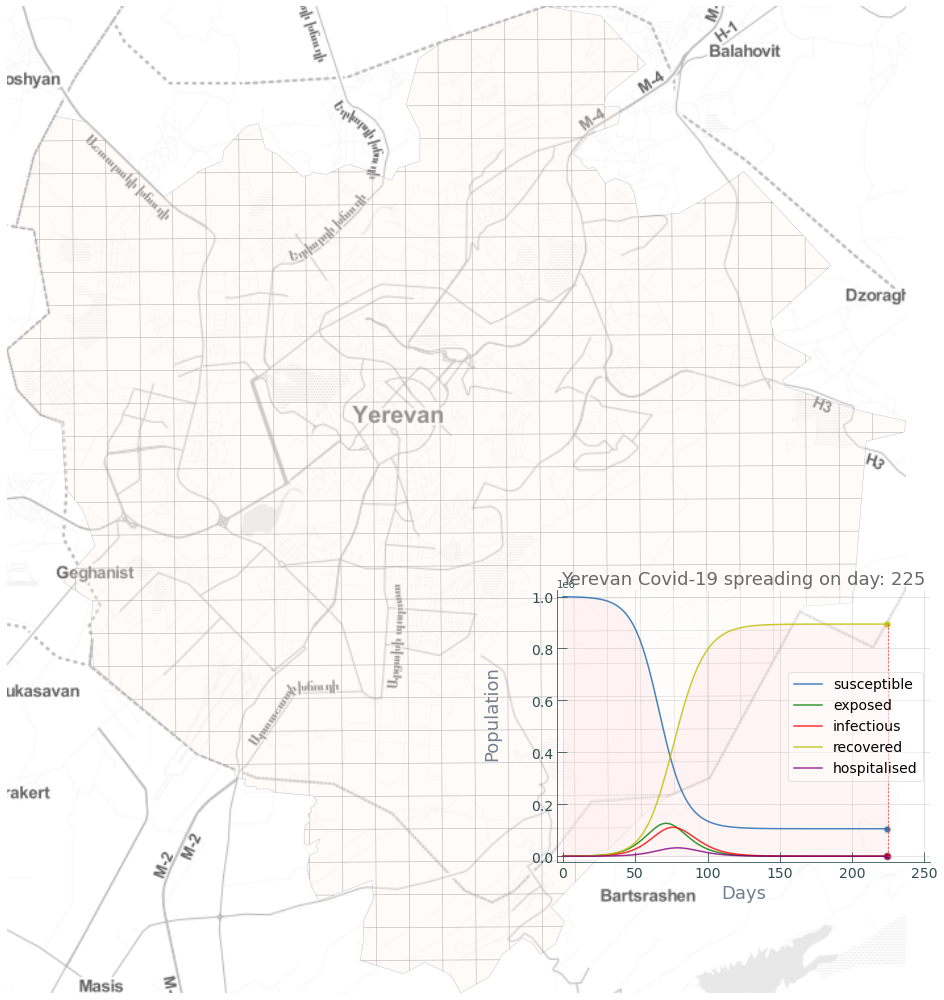

100%|█████████████████████████████████████████████████████████████████████████████▋| 249/250 [04:10<00:00,  1.07it/s]

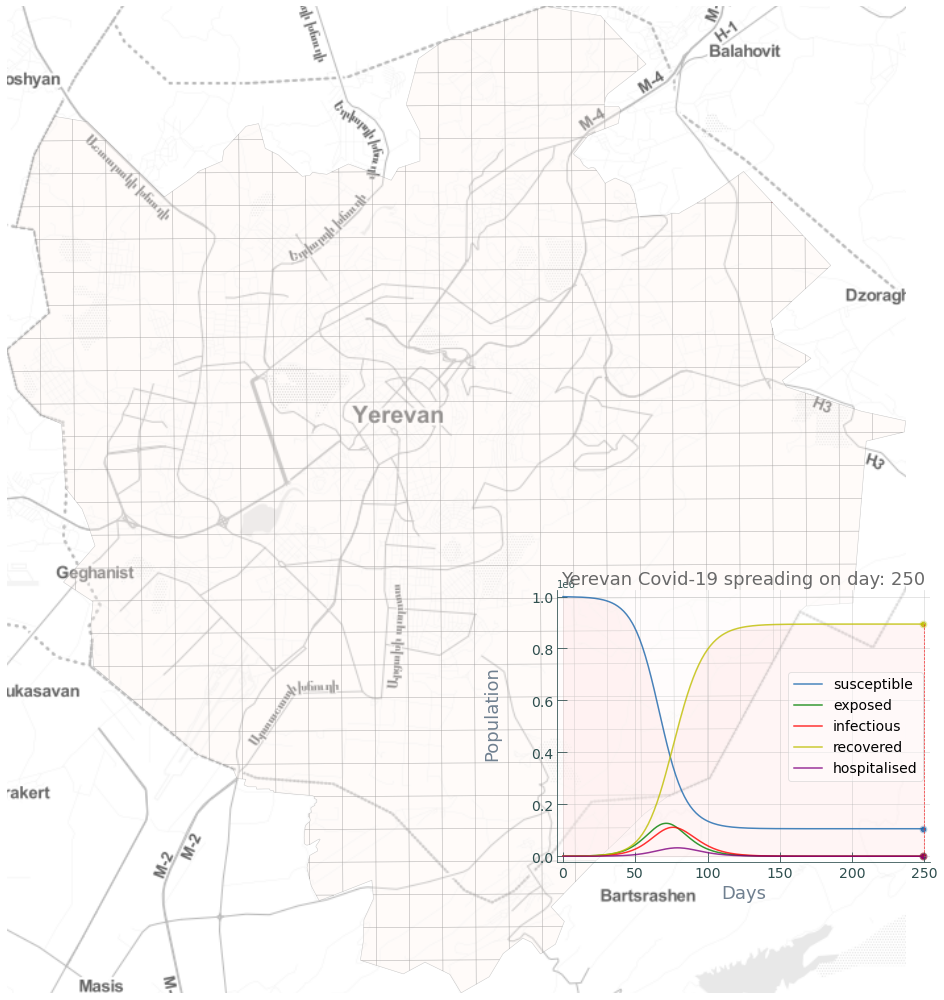

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [04:12<00:00,  1.01s/it]


In [21]:
params = {"axes.labelcolor":"slategrey"}
plt.rcParams.update(params)
cmap = plt.cm.get_cmap("Blues")
blue = cmap(200)

from tqdm import tqdm

for time_step in tqdm(range(1,251)):
    
    yerevan_gdf_3857['exposed'] = baseline[time_step-1, 1, :]
    
    #plot
    fig, ax = plt.subplots(figsize=(14,14), dpi=72)
    yerevan_gdf_3857.loc[yerevan_gdf_3857.index==84, 'exposed'] = max_exp_val + 1
    yerevan_gdf_3857.plot(ax=ax, facecolor='none', edgecolor='gray', alpha=0.5, linewidth=0.5, zorder=2)
    yerevan_gdf_3857.plot(ax=ax, column='exposed', cmap=new_cmap, zorder=3)
    # add background
    ctx.add_basemap(ax, attribution="", source=ctx.providers.Stamen.TonerLite, zoom='auto', alpha=0.6)
    
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.tight_layout()
    
    inset_ax = fig.add_axes([0.6, 0.14, 0.37, 0.27])
    inset_ax.patch.set_alpha(0.5)
    
    inset_ax.plot(baseline[:time_step, 0].sum(axis=1), label="susceptible", color=blue, ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 1].sum(axis=1), label="exposed", color='g', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 2].sum(axis=1), label="infectious", color='r', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 3].sum(axis=1), label="recovered", color='y', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(hosp[:time_step], label="hospitalised", color='purple', ls='-', lw=1.5, alpha=0.8)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 0].sum(), color=blue, s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 1].sum(), color='g', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 2].sum(), color='r', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 3].sum(), color='y', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple', s=50, alpha=0.2)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 0].sum(), color=blue, s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 1].sum(), color='g', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 2].sum(), color='r', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 3].sum(), color='y', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple', s=20, alpha=0.8)
    
    inset_ax.fill_between(np.arange(0, time_step), np.maximum(baseline[:time_step, 0].sum(axis=1), \
                                                             baseline[:time_step, 3].sum(axis=1)), alpha=0.035, color='r')
    inset_ax.plot([time_step, time_step], [0, max(baseline[(time_step-1), 0].sum(), \
                                              baseline[(time_step-1), 3].sum())], ls='--', lw=0.7, alpha=0.8, color='r')
    
    inset_ax.set_ylabel('Population', size=18, alpha=1, rotation=90)
    inset_ax.set_xlabel('Days', size=18, alpha=1)
    inset_ax.yaxis.set_label_coords(-0.15, 0.55)
    inset_ax.tick_params(direction='in', size=10)
    inset_ax.set_xlim(-4, 254)
    inset_ax.set_ylim(-24000, 1024000)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    inset_ax.grid(alpha=0.4)
    
    inset_ax.spines['right'].set_visible(False)
    inset_ax.spines['top'].set_visible(False)
    
    inset_ax.spines['left'].set_color('darkslategrey')
    inset_ax.spines['bottom'].set_color('darkslategrey')
    inset_ax.tick_params(axis='x', colors='darkslategrey')
    inset_ax.tick_params(axis='y', colors='darkslategrey')
    plt.legend(prop={'size':14, 'weight':'light'}, framealpha=0.5)
    
    plt.title("Yerevan Covid-19 spreading on day: {}".format(time_step), fontsize=18, color= 'dimgray')
    
    if time_step % 2 == 0:
        plt.savefig("../Covid Plots/flows_{}.jpg".format(time_step), dpi=fig.dpi)
    if time_step % 25 == 0:
        plt.show()
    plt.close()

In [22]:
import re

def sort_in_order( l ):
    """ sorts a given iterable
    
    l : iterable to be sorted"""
    
    convert = lambda text: int(text) if text.isdigit() else text
    alphanumeric_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanumeric_key)

from os import listdir

filenames = listdir("../Covid Plots/")
filenames = sort_in_order(filenames)
print(filenames)

['flows_2.jpg', 'flows_4.jpg', 'flows_6.jpg', 'flows_8.jpg', 'flows_10.jpg', 'flows_12.jpg', 'flows_14.jpg', 'flows_16.jpg', 'flows_18.jpg', 'flows_20.jpg', 'flows_22.jpg', 'flows_24.jpg', 'flows_26.jpg', 'flows_28.jpg', 'flows_30.jpg', 'flows_32.jpg', 'flows_34.jpg', 'flows_36.jpg', 'flows_38.jpg', 'flows_40.jpg', 'flows_42.jpg', 'flows_44.jpg', 'flows_46.jpg', 'flows_48.jpg', 'flows_50.jpg', 'flows_52.jpg', 'flows_54.jpg', 'flows_56.jpg', 'flows_58.jpg', 'flows_60.jpg', 'flows_62.jpg', 'flows_64.jpg', 'flows_66.jpg', 'flows_68.jpg', 'flows_70.jpg', 'flows_72.jpg', 'flows_74.jpg', 'flows_76.jpg', 'flows_78.jpg', 'flows_80.jpg', 'flows_82.jpg', 'flows_84.jpg', 'flows_86.jpg', 'flows_88.jpg', 'flows_90.jpg', 'flows_92.jpg', 'flows_94.jpg', 'flows_96.jpg', 'flows_98.jpg', 'flows_100.jpg', 'flows_102.jpg', 'flows_104.jpg', 'flows_106.jpg', 'flows_108.jpg', 'flows_110.jpg', 'flows_112.jpg', 'flows_114.jpg', 'flows_116.jpg', 'flows_118.jpg', 'flows_120.jpg', 'flows_122.jpg', 'flows_124.jpg'

In [23]:
import imageio
with imageio.get_writer('Covid_19.gif', mode='I', fps=16) as writer:
    for filename in tqdm(filenames):
        image = imageio.imread('../Covid Plots/{}'.format(filename))
        writer.append_data(image)

100%|██████████████████████████████████████████████████████████████████████████████| 125/125 [00:22<00:00,  5.47it/s]


### Homework assignment

Create an animated visualisation of the Covid 19 spatial epidemiological model described in this and the previous Notebooks by building Origin-Destination matrices from the Yerevan GG data.

Complete the homework assignment in a clean Jupyter Notebook, name the notebook **< Name > < Surname > Classes 13-14 Homework** and upload it to Moodle.

Note: The homework assignments for classes 13 and 14 should be completed together in one Notebook.